# Analyse Open Data Sets Using Pandas in a Python notebook

## Open Data
_**Open Data**_ is freely available, which means you can modify, store, and use it without any restrictions. Governments, academic institutions, and publicly focused agencies are the most common providers of open data. They typically share things like environmental, economic, census, and health data sets. You can learn more about open data from [The Open Data Institute](http://theodi.org/) or from [wikipedia](https://en.wikipedia.org/wiki/Open_data). Two great places to start browsing are [data.gov](data.gov) and [data.gov.uk](data.gov.uk) where you can find all sorts of data sets. Other good  sources are the [World Bank](http://data.worldbank.org/), [the FAO](http://www.fao.org/statistics/databases/en/), [eurostat](http://ec.europa.eu/eurostat/web/main) and [the bureau for labor statistics](http://www.bls.gov/data/). If you're interested in a specific country or region, just do a quick Google search, and you'll likely uncover other sources as well.   

Open data can be a powerful analysis tool, especially when you connect multiple data sets to derive new insights. This notebook helps you get started with analysis using [pandas](http://pandas.pydata.org/). Pandas is one of my favourite data analysis packages. It's very flexible and includes tools that make it easy to load, index, classify, and group data. 

In this notebook, you will learn how to work with a `DataFrame` in 3 basic steps:

1. Load data from Analytics Exchange on Bluemix.
2. Launch an Apache Spark service on Bluemix.
3. Work with a Python notebook on Bluemix (join dataframes, clean, check, and analyse the data using simple statistical tools).

## Data & Analytics on Bluemix

Bluemix (IBM's cloud platform) includes Analytics Exchange, which features a selection of open data sets that you can download and use any way you want. It's easy to get an account and grab some data:

1. [Login to Bluemix (or sign up for a free trial)](https://console.ng.bluemix.net/). 
2. From the menu at the top of any Bluemix screen, click  **Dashboard**.
3. Click the **Data & Analytics** tile. 
4. In the menu on the left side of the screen, click **Exchange**. 
3. At the top of the screen, in the **Search box**, type **Life Expectancy**. Click the  [Life expectancy at birth by country in total years](https://console.ng.bluemix.net/data/exchange/public/entry/view/f15be429051727172e0d0c226e2ce895) data set.
4. On the right side on the screen, click **Apps & Notebooks** to request a new acces key. 
4. Click **OK** to agree to terms and conditions.
4. Click **Request a New Access Key**.
5. Click the key and copy the URL that appears. You'll use it in a minute to load data into your python notebook. 
5. In the menu on the left side of the screen, click **Services**. 
6. Scroll down and click the **New Service** button. 
7. Find **Apache Spark** and click it. 
8. Click **Choose Apache Spark**, then click **Create**. 
6. Under **Work with Notebooks and Spark** click the **Notebooks** button. 
7. Click **New Notebook**.
8. Click the **From URL** tab, give the notebook a name and in the **Notebook URL** field enter: ---URL---
9. Click **Create Notebook**.  

## Load Data into a DataFrame

Paste the _URL link/access key_ you copied from the Life Expectancy data set into the following code (replacing the **\<LINK-TO-DATA\>** string). Then run the following code to load the data in a dataframe. This code keeps 3 columns and renames them.  

In [1]:
import pandas as pd
import numpy as np

# life expectancy at birth in years
life = pd.read_csv("<LINK-TO-DATA>",usecols=['Country or Area','Year','Value'])
life.columns = ['country','year','life']
life[0:5]

,country,year,life
0,Afghanistan,2012,60.509122
1,Afghanistan,2011,60.065366
2,Afghanistan,2010,59.600098
3,Afghanistan,2009,59.112341
4,Afghanistan,2008,58.607098


Life expectancy figures might be more meaningful if we combine them with other data sets from the Analytics Exchange. Let's start by loading data set [Total Population](https://console.ng.bluemix.net/data/exchange/public/entry/view/889ca053a19986a4445839358a91963e) by country and year. To do so, enter and run the following code after you have copied your link to the data: 

In [2]:
# population
population = pd.read_csv("<LINK-TO-DATA>",usecols=['Country or Area', 'Year','Value'])
population.columns = ['country', 'year','population']

print "Nr of countries in life:", np.size(np.unique(life['country']))
print "Nr of countries in population:", np.size(np.unique(population['country']))

Nr of countries in life: 246
Nr of countries in population: 277


## Joining DataFrames

These two data sets don't fit together perfectly. For instance, one lists more countries than the other. When we join the two dataframes we're sure to introduce nulls or NaNs into the new dataframe. We'll use the pandas `merge` function to handle this problem. This function includes [many options](http://pandas.pydata.org/pandas-docs/stable/merging.html). In the following code, `how='outer'` makes sure we keep all data from `life` and `population`. `on=['country','year']` specifies which columns to perform the merge on. 

In [3]:
df = pd.merge(life, population, how='outer', sort=True, on=['country','year'])
df[400:405]

,country,year,life,population
400,Antigua and Barbuda,1998,72.973780,74206.0
401,Antigua and Barbuda,1999,73.186024,76041.0
402,Antigua and Barbuda,2000,73.397293,77648.0
403,Antigua and Barbuda,2001,73.606073,78972.0
404,Antigua and Barbuda,2002,73.813390,80030.0


We can add more data to the dataframe in a similar way. For each data set, look up the link/keys for the data on Analytics Exchange and copy these into the code.

In [4]:
# poverty (%)
poverty = pd.read_csv("<LINK-TO-DATA>",usecols=['Country or Area', 'Year','Value'])
poverty.columns = ['country', 'year','poverty']
df = pd.merge(df, poverty, how='outer', sort=True, on=['country','year'])

# school completion (%)
school = pd.read_csv("<LINK-TO-DATA>",usecols=['Country or Area', 'Year','Value'])
school.columns = ['country', 'year','school']
df = pd.merge(df, school, how='outer', sort=True, on=['country','year'])

# employment
employmentin = pd.read_csv("<LINK-TO-DATA>",usecols=['Country or Area', 'Year','Value','Sex','Subclassification'])
employment = employmentin.loc[(employmentin.Sex=='Total men and women')&
                              (employmentin.Subclassification=='Total.')]
employment = employment.drop('Sex', 1)
employment = employment.drop('Subclassification', 1)
employment.columns = ['country', 'year','employment']
df = pd.merge(df, employment, how='outer', sort=True, on=['country','year'])

# births attended by skilled staff (%)
births = pd.read_csv("<LINK-TO-DATA>",usecols=['Country or Area', 'Year','Value'])
births.columns = ['country', 'year','births']
df = pd.merge(df, births, how='outer', sort=True, on=['country','year'])

# measles immunization (%)
measles = pd.read_csv("<LINK-TO-DATA>",usecols=['Country or Area', 'Year','Value'])
measles.columns = ['country', 'year','measles']
df = pd.merge(df, measles, how='outer', sort=True, on=['country','year'])

df[0:50]

,country,year,life,population,poverty,school,employment,births,measles
0,10,Interpolated using the Mid-year population for...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11,Interpolated between 2000 and 2005 assuming co...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12,Calculated from end of year population of 2011...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,13,Calculated from end of year population of 2010...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,14,Excluding Agalega and St. Brandon. Extrapolate...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,15,Excluding Agalega and St. Brandon.,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,16,Adjusted to mid-year population by geometric m...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,17,Calculated backwards from 1995 using UN WPP201...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,18,Extrapolated assuming the same growth rate as ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,19,Extrapolated assuming the same growth rate as ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The resulting table looks kind of strange, as it contains incorrect values, like numbers in the `country` column and text in the `year` column. You can manually remove these errors from the dataframe. Also, we can now create a multiindex with country and year. 

In [5]:
df2=df.drop(df.index[0:40])

df2 = df2.set_index(['country','year'])

df2[0:10]

life  population  poverty  school  employment  births  \
country     year                                                          
Afghanistan 1980   NaN         NaN      NaN     NaN         NaN     NaN   
            1982   NaN         NaN      NaN     NaN         NaN     NaN   
            1983   NaN         NaN      NaN     NaN         NaN     NaN   
            1984   NaN         NaN      NaN     NaN         NaN     NaN   
            1985   NaN         NaN      NaN     NaN         NaN     NaN   
            1986   NaN         NaN      NaN     NaN         NaN     NaN   
            1987   NaN         NaN      NaN     NaN         NaN     NaN   
            1988   NaN         NaN      NaN     NaN         NaN     NaN   
            1989   NaN         NaN      NaN     NaN         NaN     NaN   
            1990   NaN         NaN      NaN     NaN         NaN     NaN   

                  measles  
country     year           
Afghanistan 1980     11.0  
            1982      8.0  
            1983      9.0  
            1984     14.0  
            1985     14.0  
            1986     14.0  
            1987     31.0  
            1988     34.0  
            1989     22.0  
            1990     20.0

If you are curious about other variables, you can keep adding data sets from Analytics Exchange to this dataframe. Be aware that not all data is equally formatted and might need some clean-up before you add it. Use the code samples you just read about, and make sure you keep checking results with a quick look at each of your tables when you load or change them with commands like `df2[0:10]`. 

## Check the Data 
You can run a first check of the data with [`describe()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html), which calculates some basic statistics for each of the columns in the dataframe. It gives you the number of values (count), the [mean](https://en.wikipedia.org/wiki/Mean), the [standard deviation](https://en.wikipedia.org/wiki/Standard_deviation) (std), the min and max, and some [percentiles](https://en.wikipedia.org/wiki/Percentile).  

In [6]:
df2.describe()

,life,population,poverty,school,employment,births,measles
count,11969.000000,1.309100e+04,651.000000,5078.000000,2909.000000,1523.000000,6944.000000
mean,63.156417,1.409922e+08,30.763209,78.018509,14337.147966,83.944882,76.452661
std,11.290103,5.450133e+08,17.349350,25.675860,57236.797036,23.885349,22.153693
min,19.504927,4.279000e+03,1.700000,1.522030,0.663000,5.000000,1.000000
25%,54.884268,8.189045e+05,17.245109,60.831905,954.300000,73.650000,65.000000
50%,66.171191,5.366554e+06,26.900000,88.120480,3256.500000,98.000000,84.000000
75%,71.691415,2.574550e+07,43.700000,97.417360,9463.000000,99.700000,94.000000
max,83.480488,7.124544e+09,96.000000,193.263340,737400.000000,100.000000,99.000000


## Data Analysis
At this point, we have enough sample data to work with. Let's start by finding the correlation between different variables. First we'll create a scatter plot, and relate the values for two variables of each row. In our code, we also customize the look by defining the font and figure size and colours of the points with matplotlib. 

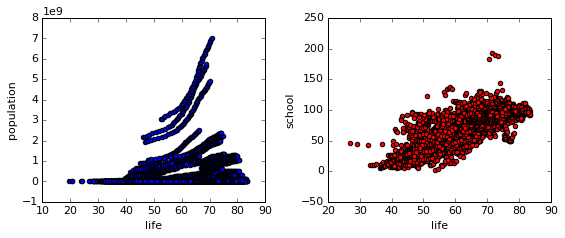

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['font.size']=11
plt.rcParams['figure.figsize']=[8.0, 3.5]
fig, axes=plt.subplots(nrows=1, ncols=2)
df2.plot(kind='scatter', x='life', y='population', ax=axes[0], color='Blue');
df2.plot(kind='scatter', x='life', y='school', ax=axes[1], color='Red');
plt.tight_layout()

The figure on the left shows that increased life expectancy leads to higher population. The figure on the right shows that the life expectancy increases with the percentage of school completion. But the percentage ranges from 0 to 200, which is odd for a percentage. You can remove the outliers by keeping the values within a specified range `df2[df2.school>100]=float('NaN')`. Even better, would be to check where these values in the original data came from. In some cases, a range like this could indicate an error in your code somewhere. In this case, the values are correct, see the [description](http://data.un.org/_Docs/WDIseries_2016_01_21.pdf) of the school completion data.
  
We don't have data for all the exact same years. So we'll group by country (be aware that we lose some information by doing so). Also because variables are percentages, we'll convert our employment figures to percent. Probably, we no longer need the `population` column, so let's drop it. Then we create scatter plots from the dataframe using `scatter_matrix`, which creates plots for all variables and also adds a histogram for each.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11997cf90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11b885610>]], dtype=object)

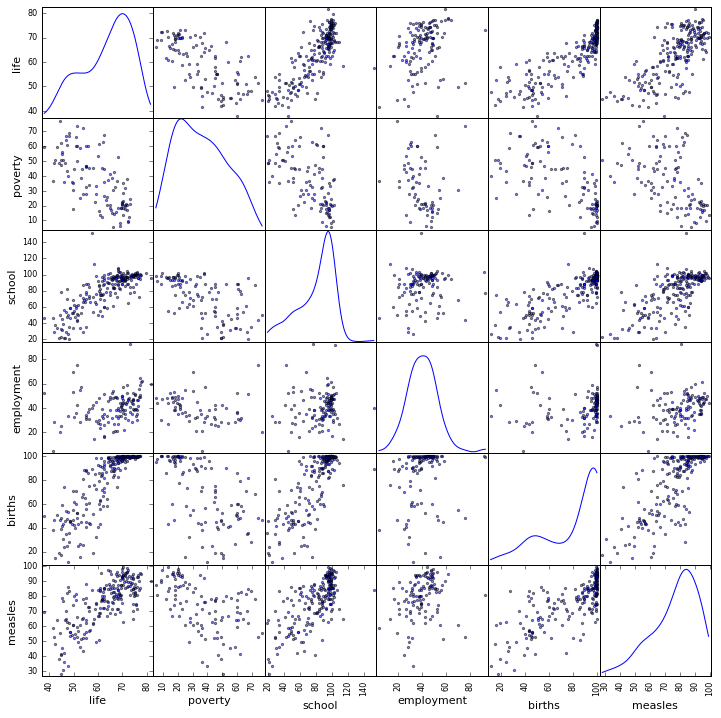

In [8]:
from pandas.tools.plotting import scatter_matrix

# group by country
grouped = df2.groupby(level=0)
dfgroup = grouped.mean()

# employment in % of total population
dfgroup['employment']=(dfgroup['employment']*1000.)/dfgroup['population']*100
dfgroup=dfgroup.drop('population',1)

scatter_matrix(dfgroup,figsize=(12, 12), diagonal='kde')

You can see that the data is now in a pretty good state. There are no large outliers. We can even start to see some relationships: life expectancy increases with schooling, employment, safe births, and measles vaccination. You are deriving insights from the data and can now build a statistical model--for instance, have a look at an _ordinary least squares_ regression ([OLS](http://statsmodels.sourceforge.net/devel/examples/notebooks/generated/ols.html)) from [StatsModels](http://statsmodels.sourceforge.net). 

## Summary
In this tutorial, you learned how to use open data from Analytics Exchange in a Python notebook. You saw how to load, clean and explore data using pandas. As you can see from this example, data analysis entails lots of trial and error. This experimentation can be challenging, but is also a lot of fun!